## Procesamiento de Lenguaje Natural 
### Sergio Alberto de León Martínez 

Primero importamos y leemos el corpus 

In [1]:
import os 
import re 
from keras.preprocessing.text import Tokenizer 

def get_texts_from_file(path_corpus, path_truth):
    tr_text = []
    tr_y = []

    with open(path_corpus, 'r') as f_corpus, open(path_truth, 'r') as f_truth:
        for twitt in f_corpus:
            tr_text += [twitt]
        for label in f_truth:
            tr_y += [label]
    return tr_text, tr_y

2024-02-27 22:58:48.361302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tr_txt, tr_y = get_texts_from_file('./mex20_train.txt', './mex20_train_labels.txt')

In [3]:
val_txt, val_y = get_texts_from_file('./mex20_val.txt', './mex20_val_labels.txt')

In [4]:
import nltk
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)
fdist = nltk.FreqDist(corpus_palabras)

In [5]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [6]:
V = sortFreqDict(fdist)
V = V[:5000]
print(V)

[(3016, ','), (2915, 'de'), (2829, 'que'), (2604, '.'), (2031, 'la'), (1956, 'a'), (1856, 'y'), (1435, '!'), (1430, 'no'), (1399, '@USUARIO'), (1198, 'me'), (1043, 'el'), (1018, 'en'), (851, 'se'), (736, 'es'), (706, 'con'), (704, '?'), (691, 'verga'), (683, 'los'), (665, 'madre'), (612, 'por'), (601, 'las'), (590, '"'), (582, 'un'), (550, 'te'), (547, 'mi'), (509, 'lo'), (493, 'putas'), (472, 'una'), (464, '...'), (462, 'putos'), (458, 'para'), (434, '😂'), (422, 'si'), (420, 'ya'), (416, 'como'), (403, 'su'), (377, 'pero'), (365, 'tu'), (357, 'loca'), (350, 'le'), (325, 'más'), (318, 'No'), (298, 'del'), (294, 'gorda'), (284, 'al'), (252, 'bien'), (249, 'A'), (243, '¿'), (242, 'Y'), (229, 'son'), (229, 'Me'), (227, 'o'), (225, 'feas'), (225, 'cuando'), (214, 'Que'), (208, ':'), (205, 'yo'), (199, 'les'), (196, 'porque'), (191, 'ni'), (191, 'está'), (189, 'ser'), (184, 'estoy'), (181, 'sus'), (172, 'todos'), (169, 'esta'), (168, 'puta'), (167, 'Ya'), (166, 'todo'), (163, 'pinche'), (16

In [7]:
dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1 
print(dict_indices)

{',': 0, 'de': 1, 'que': 2, '.': 3, 'la': 4, 'a': 5, 'y': 6, '!': 7, 'no': 8, '@USUARIO': 9, 'me': 10, 'el': 11, 'en': 12, 'se': 13, 'es': 14, 'con': 15, '?': 16, 'verga': 17, 'los': 18, 'madre': 19, 'por': 20, 'las': 21, '"': 22, 'un': 23, 'te': 24, 'mi': 25, 'lo': 26, 'putas': 27, 'una': 28, '...': 29, 'putos': 30, 'para': 31, '😂': 32, 'si': 33, 'ya': 34, 'como': 35, 'su': 36, 'pero': 37, 'tu': 38, 'loca': 39, 'le': 40, 'más': 41, 'No': 42, 'del': 43, 'gorda': 44, 'al': 45, 'bien': 46, 'A': 47, '¿': 48, 'Y': 49, 'son': 50, 'Me': 51, 'o': 52, 'feas': 53, 'cuando': 54, 'Que': 55, ':': 56, 'yo': 57, 'les': 58, 'porque': 59, 'ni': 60, 'está': 61, 'ser': 62, 'estoy': 63, 'sus': 64, 'todos': 65, 'esta': 66, 'puta': 67, 'Ya': 68, 'todo': 69, 'pinche': 70, 'puto': 71, 'tan': 72, 'Si': 73, 'La': 74, 'qué': 75, '…': 76, 'eso': 77, 'muy': 78, 'soy': 79, 'hasta': 80, 'así': 81, '¡': 82, '<URL>': 83, 'mamar': 84, 'hay': 85, 'q': 86, 'DE': 87, 'mis': 88, 'joto': 89, 'hace': 90, 'este': 91, 'cosas'

Bolsa de palabras con pesado frecuencia 

In [8]:
import numpy as np 

def build_bow_tr(tr_text, V, dict_indices):
    BOW = np.zeros((len(tr_text), len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_text:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1
    return BOW
    

In [9]:
BOW_tr = build_bow_tr(tr_txt, V, dict_indices)

1. Programa y visualiza TCOR. Puede hacer esto de forma similar a como el profesor lo hizo
en la Práctica 4 con DOR. El pesado puede ser el que el profesor sugirió en clase TCOR o
PPMI como lo sugiere Dan Jurafsky; hacer al menos dos gráficas, la de constelación de
palabras y subconjunto para ver algunas palabras con flechas.

In [11]:
def compute_tcor(tr_txt, dict_indices):
    # Prepocess the docs (tokenize)
    tam_V = len(dict_indices)
    co_ocurrence_matrix = np.zeros((tam_V, tam_V), dtype=np.float32) # Compute matrix of co-ocurrences of terms 
    for doc in tr_txt:
        tokenized_doc = tokenizer.tokenize(doc)
        tokenized_doc = list(set([token for token in tokenized_doc if token in dict_indices]))
        for i in range(len(tokenized_doc)):
            for j in range(i, len(tokenized_doc)):
                entry_i = dict_indices[tokenized_doc[i]]
                entry_j = dict_indices[tokenized_doc[j]]
                co_ocurrence_matrix[entry_i, entry_j] += 1
                co_ocurrence_matrix[entry_j, entry_i] += 1

    # Compute the DTR
    DTR = np.zeros((tam_V, tam_V), dtype=np.float32)
    for term, i in zip(co_ocurrence_matrix, range(len(co_ocurrence_matrix))):
        nonzero_positions = np.nonzero(term)[0]
        tam_co_ocurrence = len(nonzero_positions)
        for term_feat in nonzero_positions:
            DTR[i, term_feat] = (1 + np.log10(co_ocurrence_matrix[i, term_feat])) * np.log10(tam_V / tam_co_ocurrence)
    return DTR 

In [12]:
from sklearn import preprocessing

TCOR_base = compute_tcor(tr_txt, dict_indices)
preprocessing.normalize(TCOR_base, norm='l2')

array([[0.04837409, 0.04162142, 0.04135485, ..., 0.01361663, 0.01046604,
        0.01046604],
       [0.04144295, 0.04846767, 0.04147151, ..., 0.01042116, 0.01042116,
        0.01042116],
       [0.04187947, 0.04217847, 0.04907271, ..., 0.        , 0.        ,
        0.01059881],
       ...,
       [0.26045638, 0.20019247, 0.        , ..., 0.32072034, 0.        ,
        0.        ],
       [0.18811329, 0.18811329, 0.        , ..., 0.        , 0.3013688 ,
        0.        ],
       [0.17776652, 0.17776652, 0.17776652, ..., 0.        , 0.        ,
        0.28479263]], dtype=float32)

In [130]:
# Visulize the DTR
# ---> Do feature selection 
from sklearn.feature_selection import SelectKBest, chi2

features = SelectKBest(chi2, k=1000)
features.fit(BOW_tr, tr_y)

# ---> Get the indices 
best = features.get_support(indices=True)

# ---> Get the words
dict_indices_invert = {} # ranking : word
for word in dict_indices:
    dict_indices_invert[dict_indices[word]] = word 
target_words = [dict_indices_invert[index] for index in best]
target_matrix = np.array([TCOR_base[dict_indices[word]] for word in target_words])
target_matrix.shape 

(1000, 5000)

In [131]:
# ---> Reduce dimension to visualize
from tsne import tsne

reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 3.098815
Iteration 10: error is 17.529561
Iteration 20: error is 16.272588
Iteration 30: error is 16.109412
Iteration 40: error is 16.116721
Iteration 50: error is 16.134703
Iteration 60: error is 16.141921
Iteration 70: error is 16.142332
Iteration 80: error is 16.138246
Iteration 90: error is 16.137308
Iteration 100: error is 16.137111
Iteration 110: error is 2.250626
Iteration 120: error is 1.794740
Iteration 130: error is 1.625908
Iteration 140: error is 1.535786
Iteration 150: error is 1.475806
Iteration 160: error is 1.433468
Iteration 170: error is 1.402271
Iteration 180: error is 1.377642
Iteration 190: error is 1.358220
Iteration 200: error is 1.342612
Iteration 210: error is 1.329781
Iteration 220: error is 1.318898
Iteration 230: error is 1.309947
Iteration 240: error is 1.302375
Iteration 250: error is

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/e

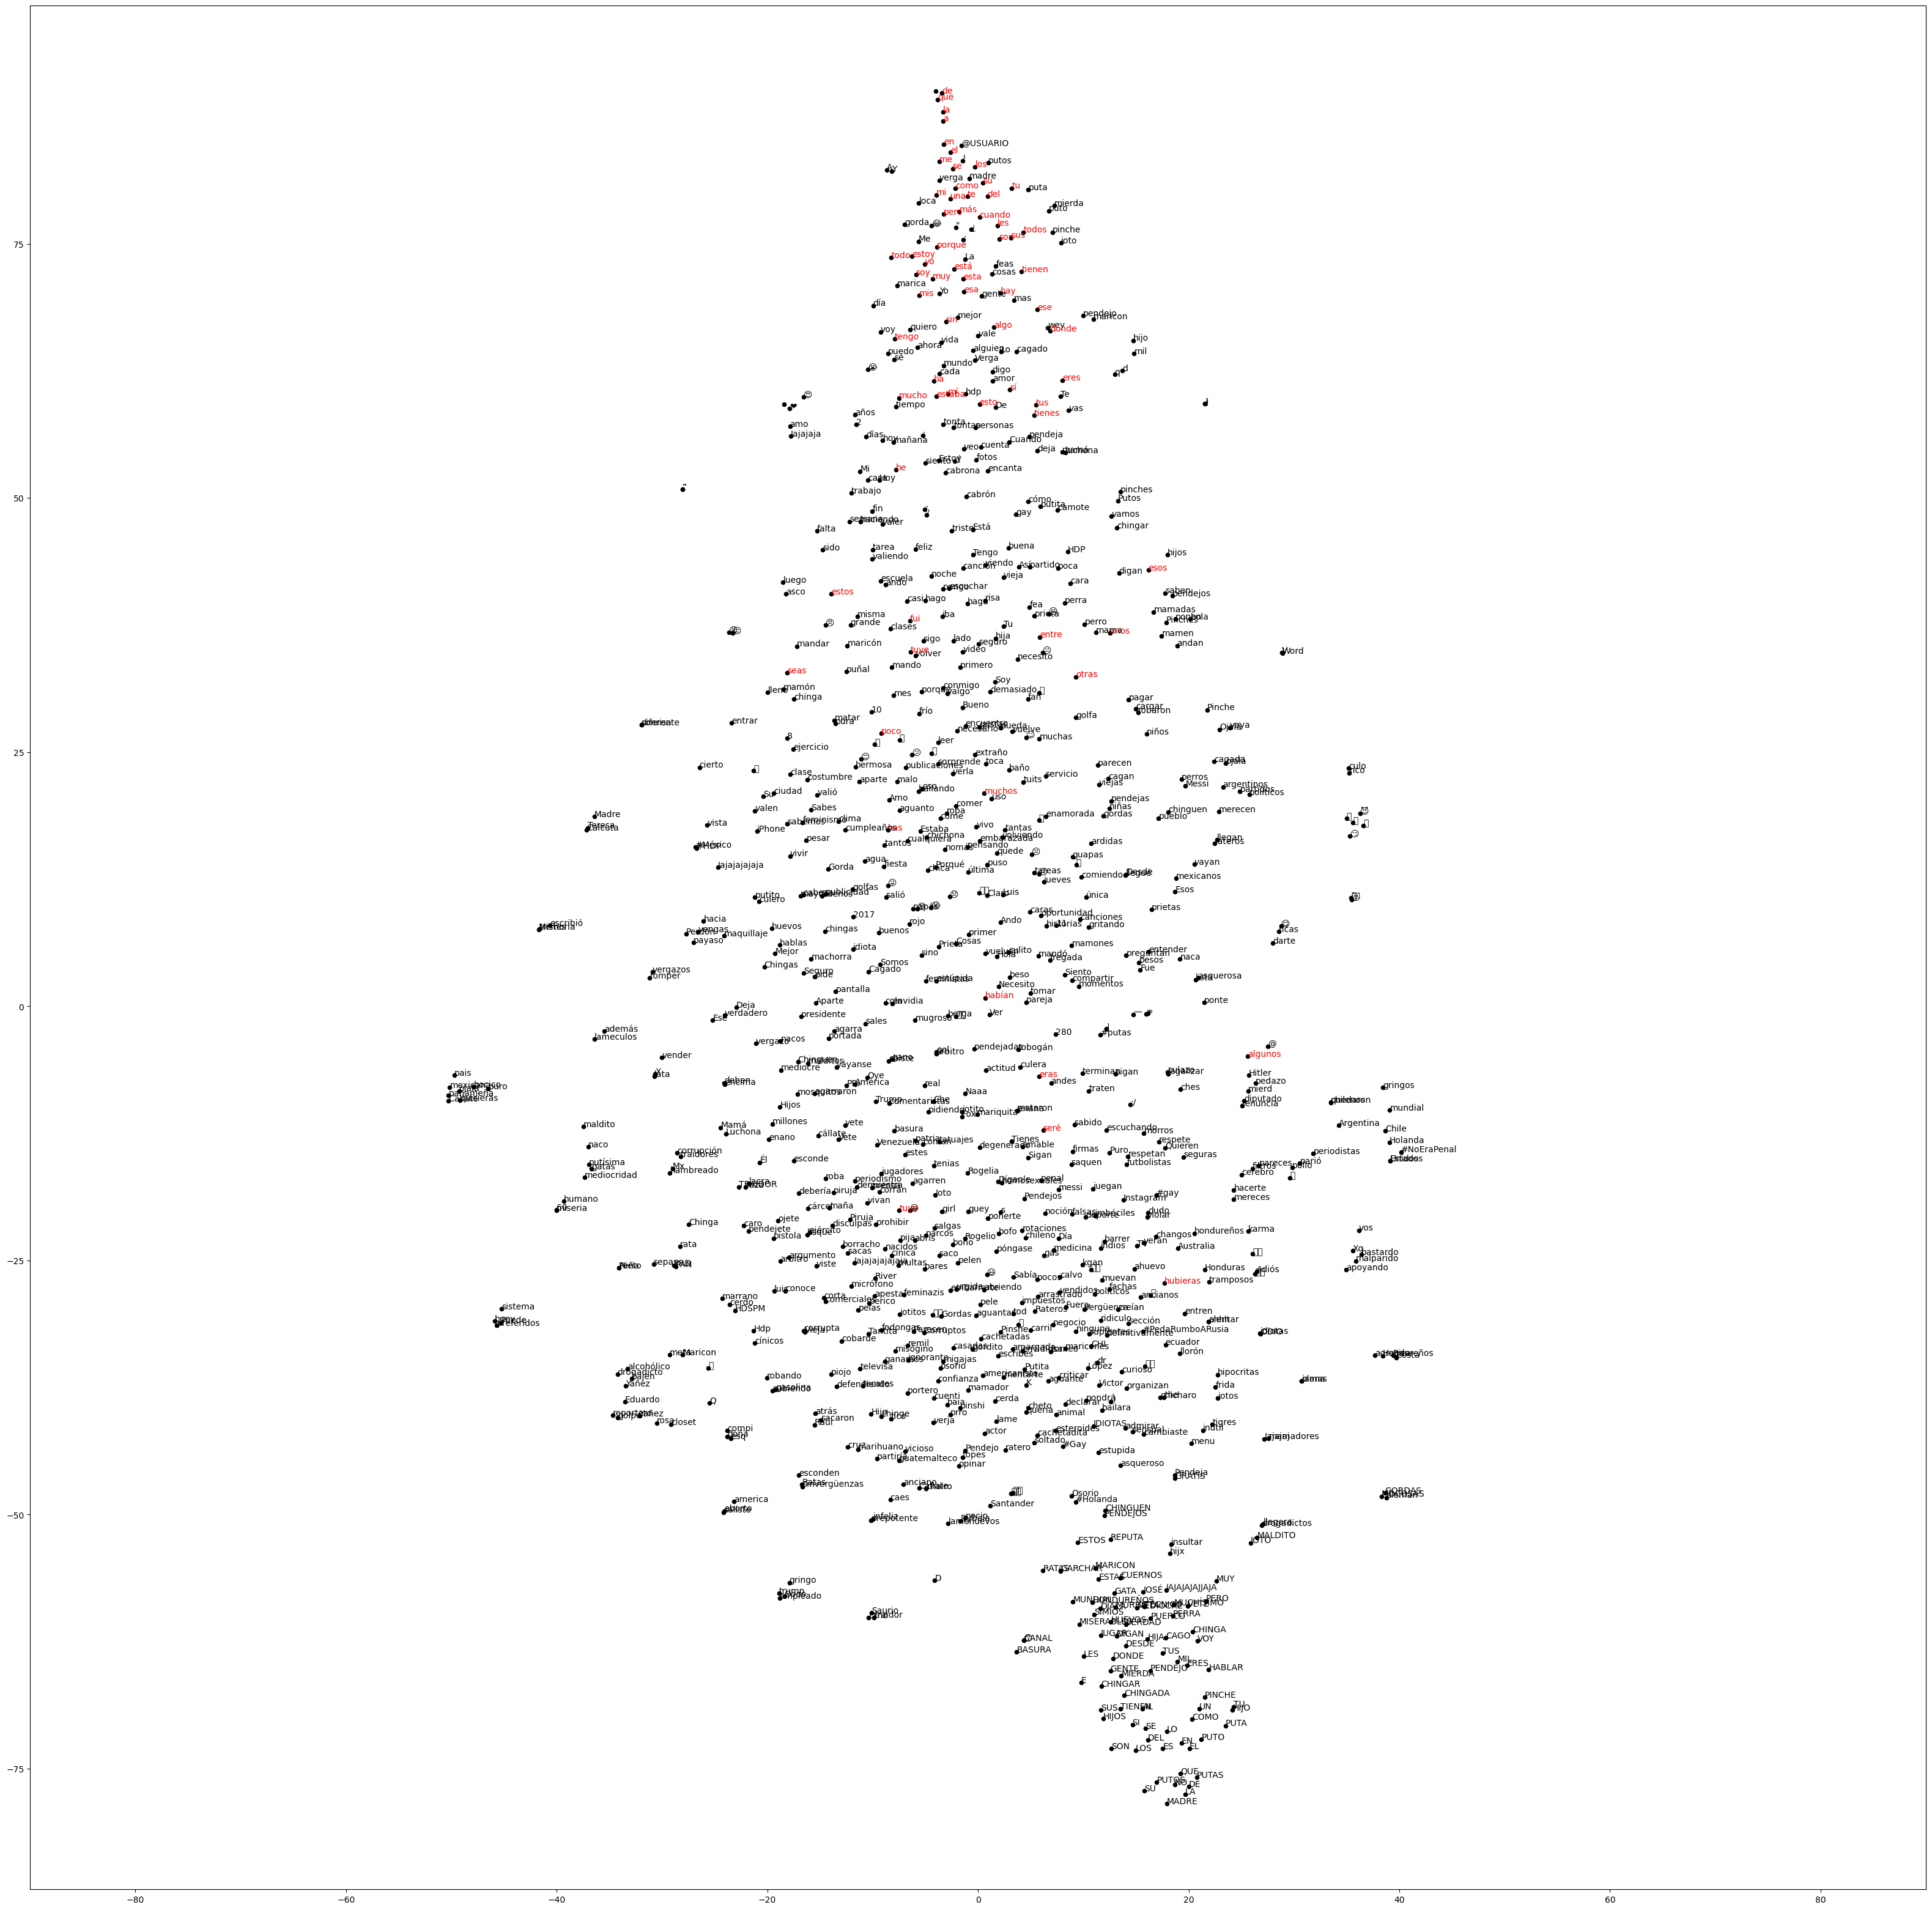

In [132]:
# ---> Visualize words constelation 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

sw = set(stopwords.words('spanish'))

plt.figure(figsize=(40, 40), dpi=100)
plt.xlim(-max_x, max_x)
plt.xlim(-max_y, max_y)
plt.scatter(reduced_matrix[:, 0],  reduced_matrix[:, 1], 20, color='black')

for idx, word in enumerate(target_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    if word in sw:
        plt.annotate(word, (x, y), color='red')
    else:
        plt.annotate(word, (x, y), color='black')

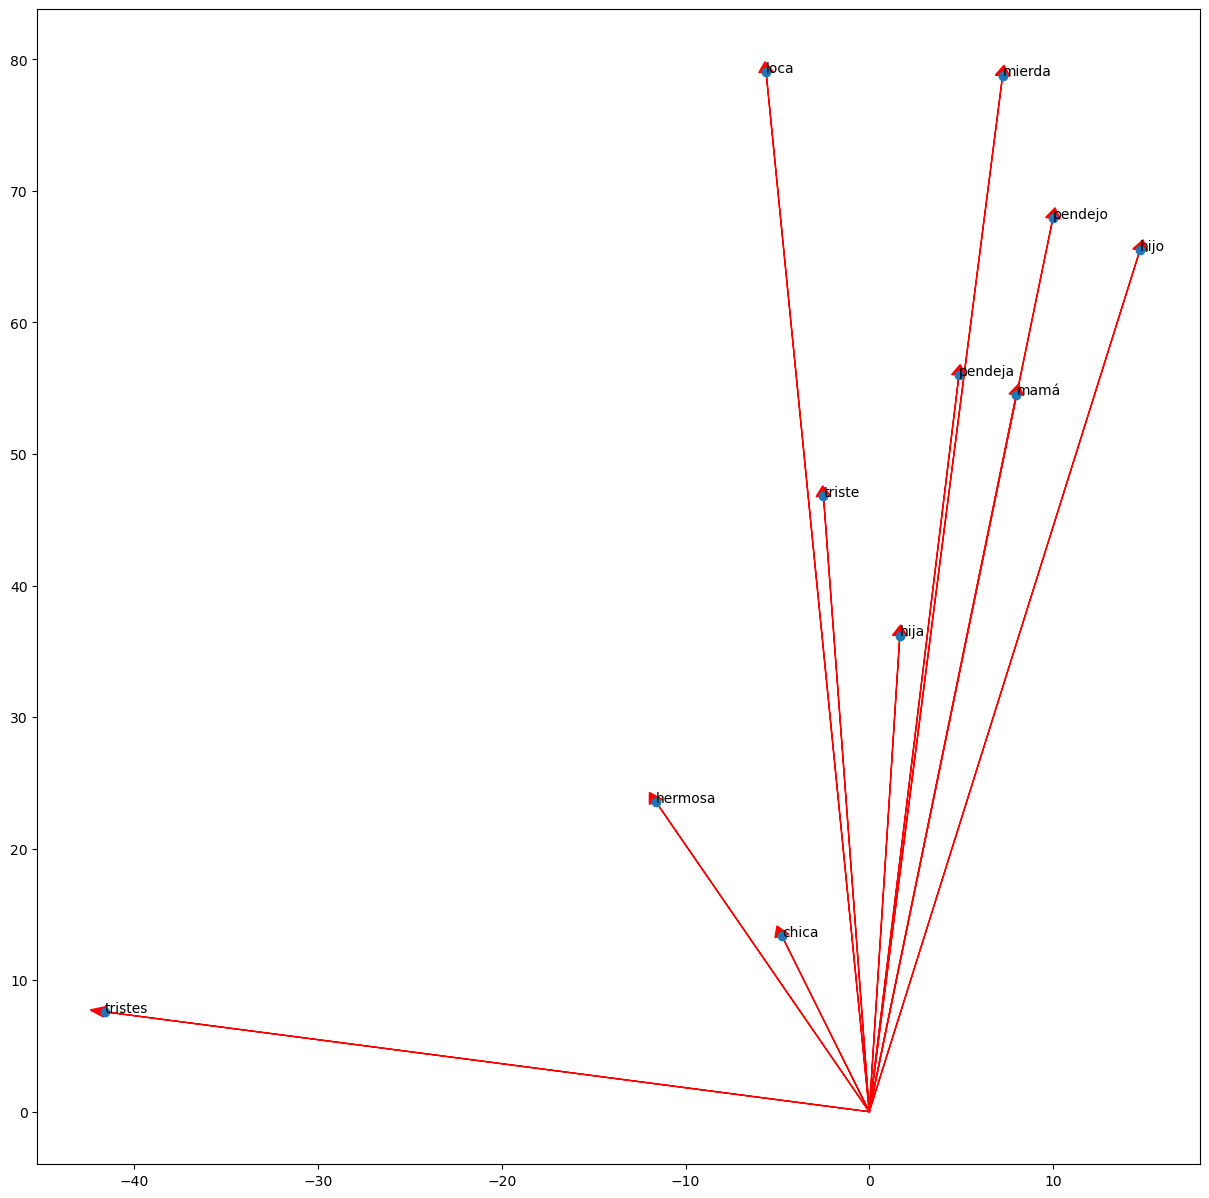

In [133]:
# Visualize the subset of words
subsetwords = ['hijo', 'hija', 'mierda', 'pendejo', 'pendeja', 'hombres', 'chica', 'tristes', 'mamá', 'hermosa', 'triste', 'loca', '@usuario', 'tia', 'alegría']

ploted_subsetwords = []
subreduced_matrix = []
for idx, word in enumerate(target_words):
    if word in subsetwords:
        ploted_subsetwords += [word]
        subreduced_matrix += [reduced_matrix[idx]]

subreduced_matrix = np.array(subreduced_matrix)

fig, ax = plt.subplots(figsize=(15, 15))

for  word in subreduced_matrix:
    ax.arrow(0, 0, word[0], word[1], head_width=0.8, head_length=0.8, fc='r', ec='r', width=1e-2)

ax.scatter(subreduced_matrix[:, 0], subreduced_matrix[:, 1])

for i in range(0, len(ploted_subsetwords)):
    ax.annotate(ploted_subsetwords[i], (subreduced_matrix[i, 0], subreduced_matrix[i, 1]))

Para construir la representación TCOR decidí usar una ventana de contexto dada por el documento, que podría ser quizás la forma más fácil de hacerlo, antes de calcular los pesados constuí una matriz donde la entrada i-j representa la cantidad de veces que co-ocurren los terminos i y j. De la constelación de palabras podemos observar que bajo la representación TCOR aparecen varios patrones interesantes, por ejemplo, las palabras vacias tienden a gruparse, también algunos caracteres especiales como emoticones, además ciertos insultos también tienden a agruparse.

2. Programa y visualiza alguna implementación de Random Indexing. Puedes hacer esto
reusando parte del código del profesor en la Práctica 4 con DOR. Hacer al menos dos
gráficas, la de constelación de palabras y subconjunto para ver algunas palabras con
flechas.

In [134]:
import random
from collections import Counter

def random_index(tr_txt, dict_indices, size_vectors):
    # Build a random index vector for each document
    index_vectors = []
    for i in range(len(tr_txt)):
        random_vector = np.array([random.randint(-1, 1) for i in range(size_vectors)])
        index_vectors.append(random_vector)
    index_vectors = np.array(index_vectors)

    # Build matrix of term-context apperences 
    term_context_matrix = np.zeros((len(dict_indices), len(tr_txt)), dtype=np.float32)
    for doc, i in zip(tr_txt, range(len(tr_txt))):
        tokenized_doc = tokenizer.tokenize(doc)
        tokenized_doc = Counter([token for token in tokenized_doc if token in dict_indices])
        for token in tokenized_doc:
            term_context_matrix[dict_indices[token], i] = 1
    
    # Accumulate to build context vector
    DTR = []
    for term in term_context_matrix:
        nonzero_positions = np.nonzero(term)[0]
        contex_vector = np.zeros(size_vectors)
        for doc in nonzero_positions:
            contex_vector = contex_vector + index_vectors[doc]
        DTR.append(contex_vector)
    DTR = np.array(DTR)

    return DTR


In [135]:
from sklearn import preprocessing

random_index_base = random_index(tr_txt, dict_indices, 1000)
preprocessing.normalize(random_index_base, norm='l2')

array([[-0.05736667,  0.00684975,  0.05137314, ...,  0.02568657,
         0.01027463, -0.00941841],
       [-0.00081357,  0.0105764 ,  0.0105764 , ...,  0.06996697,
        -0.04230561,  0.01138997],
       [-0.00931531, -0.03556756,  0.01778378, ...,  0.03726125,
        -0.01863063, -0.00508108],
       ...,
       [ 0.        , -0.055577  ,  0.        , ...,  0.        ,
        -0.0277885 ,  0.        ],
       [ 0.05465623,  0.02732812,  0.        , ..., -0.05465623,
        -0.02732812,  0.        ],
       [ 0.02798366,  0.05596732,  0.        , ...,  0.        ,
         0.        ,  0.05596732]])

In [136]:
# Visulize the DTR
# ---> Do feature selection 
from sklearn.feature_selection import SelectKBest, chi2

features = SelectKBest(chi2, k=1000)
features.fit(BOW_tr, tr_y)

# ---> Get the indices 
best = features.get_support(indices=True)

# ---> Get the words
dict_indices_invert = {} # ranking : word
for word in dict_indices:
    dict_indices_invert[dict_indices[word]] = word 
target_words = [dict_indices_invert[index] for index in best]
target_matrix = np.array([TCOR_base[dict_indices[word]] for word in target_words])
target_matrix.shape 

(1000, 5000)

In [137]:
# ---> Reduce dimension to visualize
from tsne import tsne

reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 3.098815
Iteration 10: error is 18.102351
Iteration 20: error is 16.395160
Iteration 30: error is 16.052150
Iteration 40: error is 16.089061
Iteration 50: error is 16.163740
Iteration 60: error is 16.142606
Iteration 70: error is 16.135315
Iteration 80: error is 16.139583
Iteration 90: error is 16.137414
Iteration 100: error is 16.136362
Iteration 110: error is 2.233604
Iteration 120: error is 1.778834
Iteration 130: error is 1.622369
Iteration 140: error is 1.534353
Iteration 150: error is 1.476141
Iteration 160: error is 1.433964
Iteration 170: error is 1.402483
Iteration 180: error is 1.377201
Iteration 190: error is 1.357114
Iteration 200: error is 1.341141
Iteration 210: error is 1.328276
Iteration 220: error is 1.317643
Iteration 230: error is 1.308730
Iteration 240: error is 1.301219
Iteration 250: error is

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  func(*args, **kwargs)
/Users/sergio/anaconda3/e

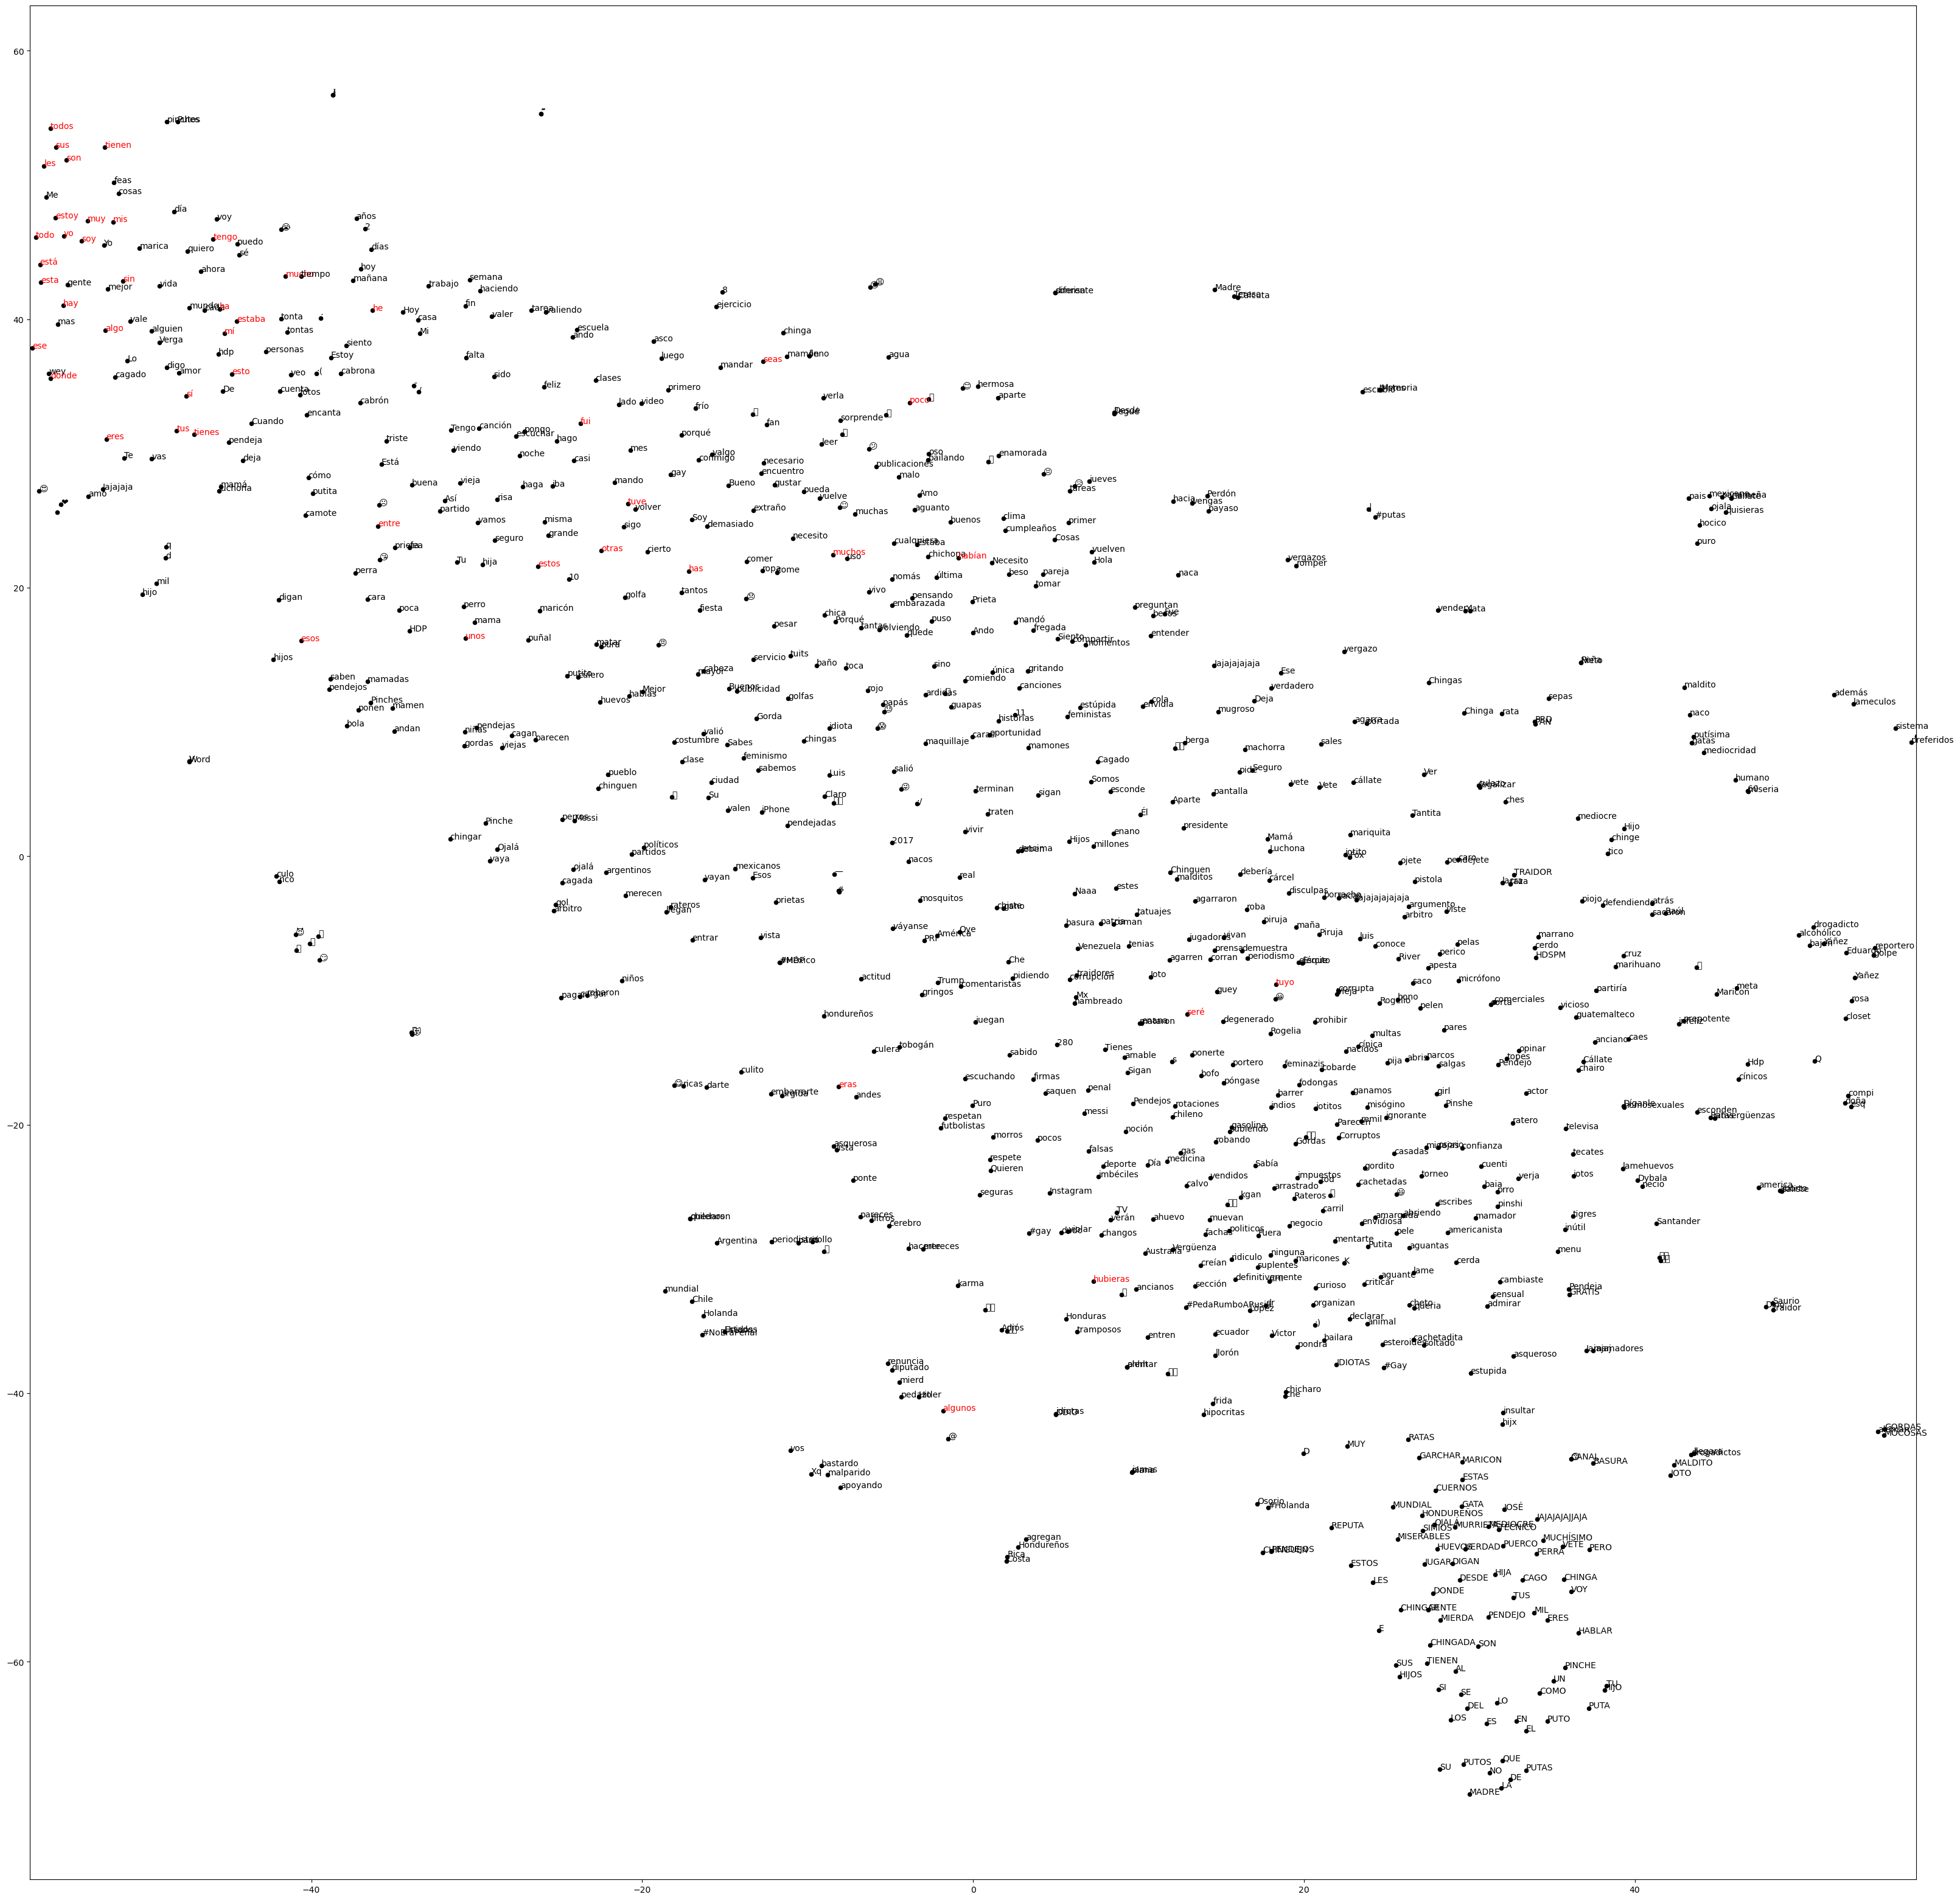

In [138]:
# ---> Visualize words constelation 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

sw = set(stopwords.words('spanish'))

plt.figure(figsize=(40, 40), dpi=100)
plt.xlim(-max_x, max_x)
plt.xlim(-max_y, max_y)
plt.scatter(reduced_matrix[:, 0],  reduced_matrix[:, 1], 20, color='black')

for idx, word in enumerate(target_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    if word in sw:
        plt.annotate(word, (x, y), color='red')
    else:
        plt.annotate(word, (x, y), color='black')

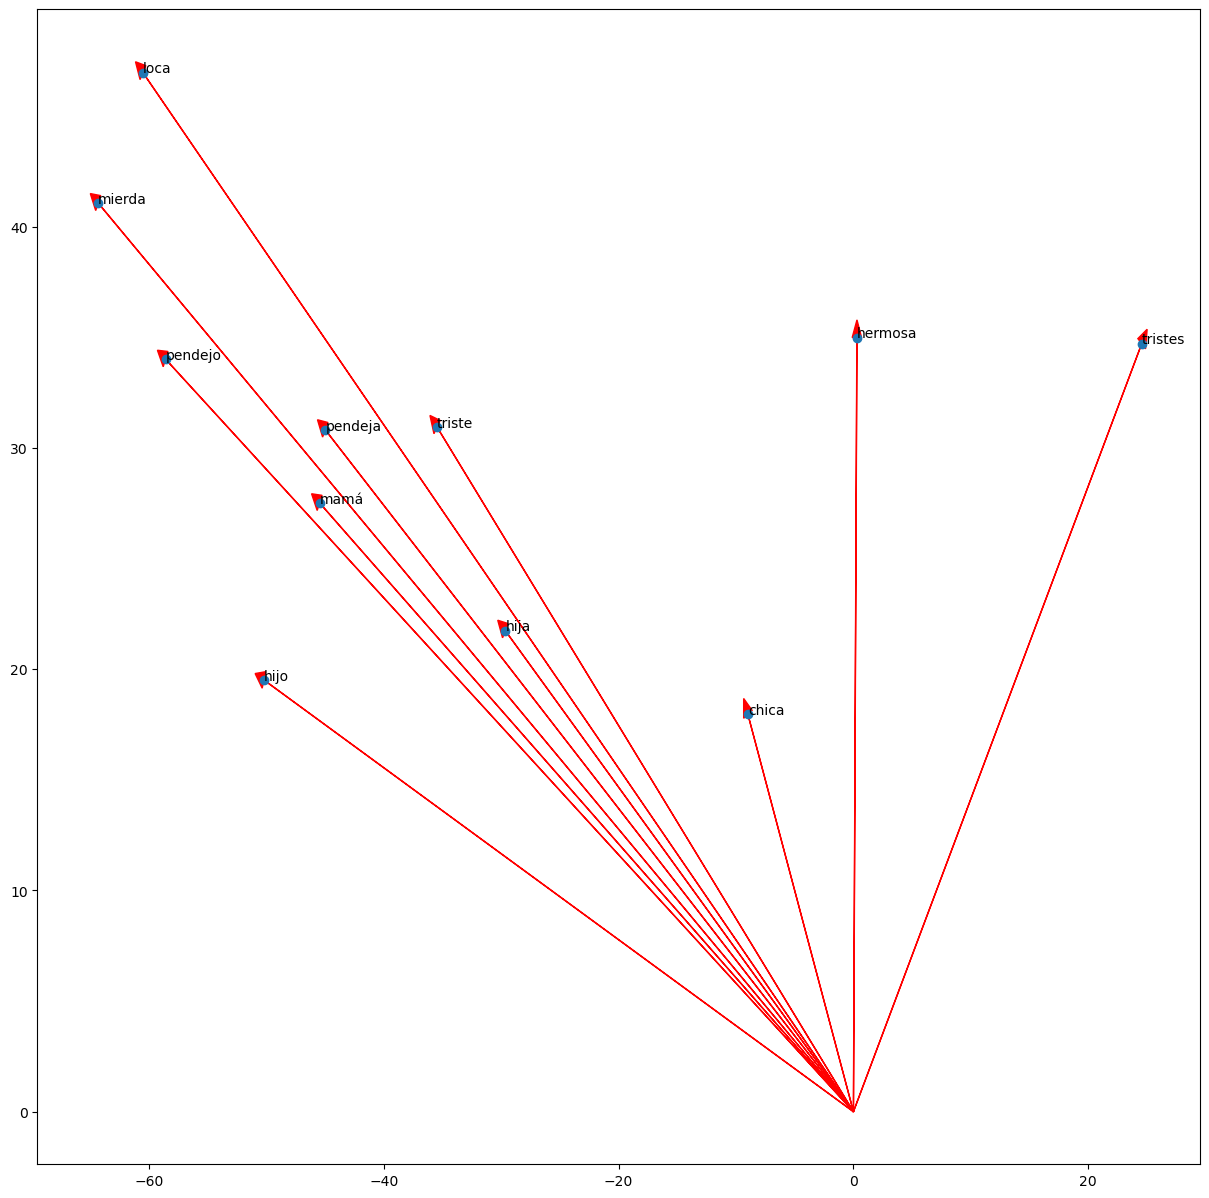

In [139]:
# Visualize the subset of words
subsetwords = ['hijo', 'hija', 'mierda', 'pendejo', 'pendeja', 'hombres', 'chica', 'tristes', 'mamá', 'hermosa', 'triste', 'loca', '@usuario', 'tia', 'alegría']

ploted_subsetwords = []
subreduced_matrix = []
for idx, word in enumerate(target_words):
    if word in subsetwords:
        ploted_subsetwords += [word]
        subreduced_matrix += [reduced_matrix[idx]]

subreduced_matrix = np.array(subreduced_matrix)

fig, ax = plt.subplots(figsize=(15, 15))

for  word in subreduced_matrix:
    ax.arrow(0, 0, word[0], word[1], head_width=0.8, head_length=0.8, fc='r', ec='r', width=1e-2)

ax.scatter(subreduced_matrix[:, 0], subreduced_matrix[:, 1])

for i in range(0, len(ploted_subsetwords)):
    ax.annotate(ploted_subsetwords[i], (subreduced_matrix[i, 0], subreduced_matrix[i, 1]))

Para este punto nuevamente decidí usar una ventana de contexto dada por el documento. Nuevamente podemos ver de la constelación de palabras como algunas de ellas tienden a agruparse, lo cual deja ver la semántica dada por el corpus, por ejemplo, nuevamente las palabras vacías se agrupan en la esquina superior izquierda, me parece interesante que esto siga ocurriendo debido a la naturaleza estocastica de los vectores de contexto que utilizamos. 

3. Use alguna de las DTRs anteriores por separado de alguna forma para clasificación de
documentos (e.g., promedio de vectores de términos en cada documento para representar).
Compárelas contra un BoW-TFIDF de 5000 palabras más frecuentes.

In [140]:
# Primero hagamos el calculo con BoW-TFIDF 

def build_bow_tfidf(tr_text, V, dict_indices):
    # Preprocess the data 
    twits_tokenizados = [Counter(tokenizer.tokenize(doc)) for doc in tr_text]
    doc_freq_token = {} # token | num of docs that contain that token 
    for twit_tokenizado in twits_tokenizados:
        for token in twit_tokenizado:
            if token in doc_freq_token:
                doc_freq_token[token] += 1
            else:
                doc_freq_token[token] = 1 

    BOW = np.zeros((len(tr_text), len(V)), dtype=np.float32)
    tam_V = len(V)
    for doc, i in zip(twits_tokenizados, range(len(twits_tokenizados))):
        for word in doc:
            if word in dict_indices and doc[word] > 0:
                BOW[i, dict_indices[word]] = (1 + np.log(doc[word])) * np.log(tam_V / doc_freq_token[word])
    return BOW

BOW_tr_tfidf = build_bow_tfidf(tr_txt, V, dict_indices)
BOW_val_tfidf = build_bow_tfidf(val_txt, V, dict_indices)

In [141]:
# Clasificación 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support

tr_y = list(map(int, tr_y))
val_y = list(map(int, val_y))

def clasificacion(bow_train, bow_val, tr_y, val_y): 
    '''
        Función para clasificar con SVM
    '''
    parameters = {'C' : [.05, .12, .25, .5, 1, 2, 4]}

    svr = svm.LinearSVC(class_weight='balanced')
    grid = GridSearchCV(
        estimator=svr, 
        param_grid=parameters, 
        n_jobs=8, 
        scoring='f1_macro', 
        cv=5
    )

    grid.fit(bow_train, tr_y)
    y_pred = grid.predict(bow_val)

    p, r, f, _ = precision_recall_fscore_support(
        val_y, 
        y_pred, 
        average='macro', 
        pos_label=1
    )

    print(confusion_matrix(val_y, y_pred))
    print(metrics.classification_report(val_y, y_pred))

In [142]:
# Clasificamos con BoW TFIDF
clasificacion(BOW_tr_tfidf, BOW_val_tfidf, tr_y, val_y)

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/a

[[343  75]
 [ 63 106]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       418
           1       0.59      0.63      0.61       169

    accuracy                           0.76       587
   macro avg       0.72      0.72      0.72       587
weighted avg       0.77      0.76      0.77       587



In [143]:
# Clasificación con TCOR
# --> Document representation
def build_doc_rep_tcor(tr_txt, dict_indices, TCOR_base):
    doc_representations_tcor = np.zeros((len(tr_txt), len(TCOR_base[0])))
    for doc, i in zip(tr_txt, range(len(tr_txt))):
        tokenized_doc = tokenizer.tokenize(doc)
        tokenized_doc = Counter([token for token in tokenized_doc if token in dict_indices])
        for token in tokenized_doc:
            doc_representations_tcor[i] = doc_representations_tcor[i] + TCOR_base[dict_indices[token]]
    return doc_representations_tcor

doc_representations_tcor_train = build_doc_rep_tcor(tr_txt, dict_indices, TCOR_base)

In [144]:
TCOR_base_val = compute_tcor(val_txt, dict_indices)
doc_representations_tcor_val = build_doc_rep_tcor(val_txt, dict_indices, TCOR_base_val)

In [146]:
preprocessing.normalize(doc_representations_tcor_train, norm='l2')
preprocessing.normalize(doc_representations_tcor_val, norm='l2')
clasificacion(doc_representations_tcor_train, doc_representations_tcor_val, tr_y, val_y)

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/a

[[152 266]
 [ 26 143]]
              precision    recall  f1-score   support

           0       0.85      0.36      0.51       418
           1       0.35      0.85      0.49       169

    accuracy                           0.50       587
   macro avg       0.60      0.60      0.50       587
weighted avg       0.71      0.50      0.51       587



/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [149]:
# Clasificación con random indexing 
# --> Document representation
def build_doc_rep_random_index(tr_txt, dict_indices, random_index_base):
    doc_reps_rand_index = np.zeros((len(tr_txt), len(random_index_base[0])))
    for doc, i in zip(tr_txt, range(len(tr_txt))):
        tokenized_doc = tokenizer.tokenize(doc)
        tokenized_doc = Counter([token for token in tokenized_doc if token in dict_indices])
        n = len(tokenized_doc)
        for token in tokenized_doc:
            doc_reps_rand_index[i] = doc_reps_rand_index[i] + random_index_base[dict_indices[token]] / n
    return doc_reps_rand_index

doc_rep_rand_index_train = build_doc_rep_random_index(tr_txt, dict_indices, random_index_base)

In [150]:
random_index_base_val = random_index(val_txt, dict_indices, size_vectors=1000)
doc_rep_rand_index_val = build_doc_rep_random_index(val_txt, dict_indices, random_index_base_val)

In [151]:
preprocessing.normalize(doc_rep_rand_index_train, norm='l2')
preprocessing.normalize(doc_rep_rand_index_val, norm='l2')
clasificacion(doc_rep_rand_index_train, doc_rep_rand_index_val, tr_y, val_y)

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/a

[[ 42 376]
 [ 21 148]]
              precision    recall  f1-score   support

           0       0.67      0.10      0.17       418
           1       0.28      0.88      0.43       169

    accuracy                           0.32       587
   macro avg       0.47      0.49      0.30       587
weighted avg       0.56      0.32      0.25       587



/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Las métricas de accuracy de ambas representaciones fueron considerablemente menores que la de bolsa de palabras, concretamente 0.50 y 0.32 para TCOR Y Random Indexing, esto podría deberse a que las ventanas de contexto que usamos fueron de todo el documento o twit, hagamos un experimento con una ventana de contexto más pequeña para comparar

In [14]:
def compute_tcor(tr_txt, dict_indices, size_window=10):
    # Tokenized the corpus
    corpus_tokenized = []
    for doc in tr_txt:
        corpus_tokenized += tokenizer.tokenize(doc)
    # Build co-ocurrence matrix 
    tam_V = len(dict_indices)
    co_ocurrence_matrix = np.zeros((tam_V, tam_V), dtype=np.float32)  
    for i in range(len(corpus_tokenized) - size_window):
        context = corpus_tokenized[i:i+size_window]
        context = list(set([token for token in context if token in dict_indices]))
        for i in range(len(context)):
            for j in range(i, len(context)):
                entry_i = dict_indices[context[i]]
                entry_j = dict_indices[context[j]]
                co_ocurrence_matrix[entry_i, entry_j] += 1
                co_ocurrence_matrix[entry_j, entry_i] += 1

    # Compute the DTR
    DTR = np.zeros((tam_V, tam_V), dtype=np.float32)
    for term, i in zip(co_ocurrence_matrix, range(len(co_ocurrence_matrix))):
        nonzero_positions = np.nonzero(term)[0]
        tam_co_ocurrence = len(nonzero_positions)
        for term_feat in nonzero_positions:
            DTR[i, term_feat] = (1 + np.log10(co_ocurrence_matrix[i, term_feat])) * np.log10(tam_V / tam_co_ocurrence)
    return DTR 

In [15]:
TCOR_train = compute_tcor(tr_txt, dict_indices, size_window=10)

In [196]:
TCOR_val = compute_tcor(val_txt, dict_indices)

In [187]:
TCOR_train_doc_rep = build_doc_rep_tcor(tr_txt, dict_indices, TCOR_train)
TCOR_val_doc_rep = build_doc_rep_tcor(val_txt, dict_indices, TCOR_val)

In [197]:
clasificacion(TCOR_train_doc_rep, TCOR_val_doc_rep, tr_y, val_y)

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/a

[[276 142]
 [ 98  71]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       418
           1       0.33      0.42      0.37       169

    accuracy                           0.59       587
   macro avg       0.54      0.54      0.53       587
weighted avg       0.62      0.59      0.60       587



/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [198]:
import random
from collections import Counter

def random_index(tr_txt, dict_indices, size_vectors, size_window):
    # Tokenized corpus
    corpus_tokenized = []
    for doc in tr_txt:
        corpus_tokenized += tokenizer.tokenize(doc)
    print('Corpus tokenizado')
    # Build a random index vector for each context
    index_vectors = []
    for i in range(len(corpus_tokenized) - size_window):
        random_vector = np.array([random.randint(-1, 1) for i in range(size_vectors)])
        index_vectors.append(random_vector)
    index_vectors = np.array(index_vectors)
    print('Vectores de indice completados')

    # Build matrix of term-context apperences 
    term_context_matrix = np.zeros((len(dict_indices), len(index_vectors)), dtype=np.float32)
    for i in range(len(corpus_tokenized) - size_window):
        context = corpus_tokenized[i:i + size_window]
        context = Counter([token for token in context if token in dict_indices])
        for token in context:
            term_context_matrix[dict_indices[token], i] = 1
    print('Matriz de termino_contexto construida')

    # Accumulate to build context vector
    DTR = []
    for term in term_context_matrix:
        nonzero_positions = np.nonzero(term)[0]
        contex_vector = np.zeros(size_vectors)
        for doc in nonzero_positions:
            contex_vector = contex_vector + index_vectors[doc]
        DTR.append(contex_vector)
    DTR = np.array(DTR)
    print('DTR constuida ')

    return DTR


In [199]:
random_index_train = random_index(tr_txt, dict_indices, size_vectors=1000, size_window=5)

Corpus tokenizado
Vectores de indice completados
Matriz de termino_contexto construida
DTR constuida 


In [200]:
random_index_val = random_index(val_txt, dict_indices, size_vectors=1000, size_window=5)

Corpus tokenizado
Vectores de indice completados
Matriz de termino_contexto construida
DTR constuida 


In [201]:
random_index_train_doc_rep = build_doc_rep_random_index(tr_txt, dict_indices, random_index_train)
random_index_val_doc_rep = build_doc_rep_random_index(val_txt, dict_indices, random_index_val)


In [202]:
clasificacion(random_index_train_doc_rep, random_index_val_doc_rep, tr_y, val_y)

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sergio/a

[[260 158]
 [103  66]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       418
           1       0.29      0.39      0.34       169

    accuracy                           0.56       587
   macro avg       0.51      0.51      0.50       587
weighted avg       0.59      0.56      0.57       587



/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Con una ventana de contexto de 5 tokens, el accuracy para la representación con TCOR subio a 59 y para random indexing a 56, siendo este último un aumento considerable, lo cual deja en evidencia lo importante de la ventana de contexto. 

4. Bajo la representación TCOR de los términos, y asumiendo un vocabulario de 5000
palabras, muestre por orden de mayor similitud coseno (ver chp 6 del libro de Dan) los
10 pares de palabras más parecidas en toda la colección.

In [16]:
# Primero normalizamos
TCOR_train_normalized = preprocessing.normalize(TCOR_train, axis=1)
TCOR_train_normalized

array([[0.04047605, 0.03391106, 0.03364187, ..., 0.01415889, 0.01383495,
        0.01415889],
       [0.03387196, 0.04046892, 0.0336425 , ..., 0.01304721, 0.01304721,
        0.0120139 ],
       [0.03453467, 0.03457519, 0.04148086, ..., 0.        , 0.        ,
        0.01073472],
       ...,
       [0.22037588, 0.20330754, 0.        , ..., 0.28671563, 0.        ,
        0.        ],
       [0.21069013, 0.19892308, 0.        , ..., 0.        , 0.2805324 ,
        0.        ],
       [0.22231933, 0.18885696, 0.16419631, ..., 0.        , 0.        ,
        0.28924415]], dtype=float32)

In [17]:
# Primero calculamos las similitudes 
size_v = len(TCOR_train_normalized)
sim_dict = {} # similarity | (i, j)
for i in range(size_v):
    for j in range(i, size_v):
        sim = TCOR_train_normalized[i].T @ TCOR_train_normalized[j]
        sim_dict[sim] = (i, j)        

In [20]:
# Experimento Quiz: calculamos similitudes con kernel gaussiano 
size_v = len(TCOR_train_normalized)
sim_dict = {} # similarity | (i, j)
sigma = 1000
for i in range(size_v):
    for j in range(i, size_v):
        dist = np.linalg.norm(TCOR_train_normalized[i] - TCOR_train_normalized[j])
        sim = np.e**((-dist**2)/sigma)
        sim_dict[sim] = (i, j)     

In [26]:
# Extraemos las 10 palabras más similares
sim_dict_sorted = sorted(sim_dict.items(), reverse=True)
vocabulario = list(dict_indices)
target_words = []
count = 0
for _, (i, j) in sim_dict_sorted:
    word_i = vocabulario[i]
    word_j = vocabulario[j] 
    if word_i != word_j:
        count += 1
        target_words.append((word_i, word_j))
    if count == 10:
        break

In [27]:
print(target_words)

[('Unidos', 'Estados'), ('Ramos', 'César'), ('Jesús', 'Delgado'), ('TENGAN', 'TANTITA'), ('Marquez', 'Garcia'), ('Valentín', 'Elizalde'), ('Wars', 'Star'), ('Saurio', 'Dino'), ('Jonas', 'Joe'), ('litros', '500')]


Para hacer este experimento usamos la representación TCOR de documentos con la cuál obtuvimos un mejor rendimiento en la clasficiación, luego de normalizar la representación, calculamos las similitudes entre palabras y obtuvimos resultados bastante interesantes, mostrando parejas de palabras como 'Star Wars' o 'García Márquez', esto deja en evidencia que de sólo contar co-ocurrencias en el corpus se pueden obtener relaciones interesantes.

5. Bajo la representación BoW-TFIDF de los documentos, y asumiendo un vocabulario de
5000 palabras, muestre en por orden de más similitud coseno (ver chp 6 del libro de Dan)
los 10 pares de documentos más parecidos en toda la colección. Muestre el texto que
contienen y muestre la categoría de cada uno.

In [220]:
# Primero normalizamos BoW-TFIDF 
bowtfidf_train_normalized = preprocessing.normalize(BOW_tr_tfidf, axis=1)
bowtfidf_train_normalized

array([[0.        , 0.05308986, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06149386, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.06574173, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0844892 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05275206, 0.04872114, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [221]:
# Luego calculamos las similitudes para BoW-TFIDF 
size_d = len(bowtfidf_train_normalized)
sim_dict = {} # similarity | (i, j)
for i in range(size_d):
    for j in range(i, size_d):
        sim = bowtfidf_train_normalized[i].T @ bowtfidf_train_normalized[j]
        sim_dict[sim] = (i, j)        

In [228]:
# Extraemos los 10 documentos más similares
sim_dict_sorted = sorted(sim_dict.items(), reverse=True)
target_docs = []
target_labels = []
count = 0
for _, (i, j) in sim_dict_sorted:
    doc_i = tr_txt[i]
    doc_j = tr_txt[j] 
    if doc_i != doc_j:
        target_docs.append((doc_i, doc_j))
        target_labels.append((i, j))
        count += 1
    if count == 10:
        break

In [229]:
for i in range(len(target_docs)):
    (doc_1, doc_2) = target_docs[i]
    print(f'\nDocumento similar 1 de la clase: {tr_y[target_labels[i][0]]}', doc_1)
    print(f'\nDocumento similar 2 de la clase: {tr_y[target_labels[i][1]]}', doc_2)



Documento similar 1 de la clase: 1 Bajate pero a mamar mi verga no pares que te quiero hacer romper tu culo a vergazos


Documento similar 2 de la clase: 1 @USUARIO Bajate pero a mamar mi verga no pares que te quiero hacer romper tu culo a vergazos


Documento similar 1 de la clase: 0 Jamás te vayas a dormir triste o enojado, duerme con una sonrisa y ten en mente esto: “Valió madre este día, pero mañana será diferente”.


Documento similar 2 de la clase: 0 Jamás te vayas a dormir triste o enojado, duerme con una sonrisa y ten  en mente esto: “Valió verga este día, pero mañana será diferente”.


Documento similar 1 de la clase: 0 @USUARIO @USUARIO @USUARIO Si pero porque hay lameculos en la coparmex, simpatizantes del opus day y grupitos pedorros de ese estilo. Con honor a la verdad no lo es.


Documento similar 2 de la clase: 1 Si pero porque hay lameculos en la coparmex, simpatizantes del opus day y grupitos pedorros de ese estilo. Con honor a la verdad no lo es.


Documento similar 

Primero normalizamos la representación de documentos TFIDF y posteriormente calculamos la similitudes entre documentos, de nuevo los resultados muestran twits muy parecidos que se diferencian por alguna palabra o caracter especial, algunos de ellos incluso realmente son el mismo documento, diferenciandose sólo por aspectos de formato y estructura, como trabajo futuro sería conveniente elaborar una estrategia para evitar estos casos. Otra cosa que me gustaría resaltar es que los documentos que son similares, tienden a pertenecer a la misma clase, lo cuál habla bien del criterio de similitud que estamos utilizando.

6. Implemente Ganancia de Información o Chi2 como lo sugiere Baeza-Yates (no función
de sklearn ni similar) para descubrir el top 50 de las palabras más relevantes de TODA la
colección. Haga una gráfica también con la herramienta de word_cloud dónde el tamaño
de la palabra corresponda a su ganancia de información:
• https://amueller.github.io/word_cloud/

In [237]:
def feature_selection_chi(tr_txt, tr_y, num_classes, num_features):
    # Preprocess docs
    corpus_tokenized = []
    for doc in tr_txt:
        corpus_tokenized += tokenizer.tokenize(doc)
    corpus_tokenized = list(set(corpus_tokenized))
    dict_tokens = {} # token | index ; dictionary of all tokens 
    for i, token in enumerate(corpus_tokenized):
        dict_tokens[token] = i

    # Variables 
    N_t = len(tr_txt)
    n_p = np.array([len(tr_y) - sum(tr_y), sum(tr_y)])
    term_matrix = np.zeros((len(dict_tokens), num_classes + 1)) # n_ip, n_i
    for i, doc in enumerate(tr_txt):
        doc_class = tr_y[i]
        doc_tokenized = Counter(tokenizer.tokenize(doc))
        for token in doc_tokenized:
            idx_token = dict_tokens[token]
            term_matrix[idx_token, doc_class] += 1
            term_matrix[idx_token, num_classes] += 1
    
    # Chi values 
    chi_matrix = np.zeros((len(dict_tokens), num_classes))
    for i in range(len(dict_tokens)):
        for j in range(num_classes):
            n_ip = term_matrix[i, j]
            n_i = term_matrix[i, num_classes]
            np_ = n_p[j] 
            chi_matrix[i, j] = (N_t * (N_t * n_ip - np_ * n_i) ** 2) / (np_ * n_i * (N_t - np_) * (N_t - n_i))

    chi_values = {} # token | chi value
    for i, term in enumerate(chi_matrix):
        chi_value = term.max()
        chi_values[corpus_tokenized[i]] = chi_value

    # Words selected
    chi_values_sorted = dict(sorted(chi_values.items(), key=lambda item: item[1], reverse=True))
    target_words = dict(list(chi_values_sorted.items())[:num_features])

    return target_words

In [238]:
collection = tr_txt + val_txt
collection_labels = tr_y + val_y
target_words = feature_selection_chi(collection, collection_labels, num_classes=2, num_features=50)

Imprimimos las palabras más importantes dadas por feature selection 

In [239]:
print(target_words)

{'@USUARIO': 164.30604438914963, 'hdp': 146.5110285134412, 'HDP': 145.36533591480293, 'pinche': 145.11732269007874, 'putos': 136.55230475537311, 'loca': 128.5185436690309, 'tu': 128.14314951555068, 'pendejo': 117.16465094958544, 'maricon': 112.25205457197674, 'me': 111.36206128411789, 'mierda': 101.40883775100143, 'puta': 95.10107075918175, 'hijo': 92.2365541191803, 'pinches': 58.619882726631516, 'Pinche': 55.37776061167529, 'golfa': 55.34515814530533, 'pendejos': 54.35416417438219, 'estoy': 50.38193528231504, 'perra': 48.51572037355829, 'mi': 47.00072938691225, 'joto': 44.62247039207981, 'Putos': 43.31773922053136, 'lameculos': 42.931801391770655, 'mundial': 37.623774352814706, 'chingar': 37.537055683002805, 'Pinches': 37.348475859034366, 'en': 36.26169206877015, 'hijos': 35.30801816608885, 'son': 35.236935243674594, 'bola': 34.72625795728198, 'soy': 33.59936460489293, 'putita': 33.53266217667544, 'a': 32.59558160841471, 'eres': 31.812794388189676, 'verga': 31.61433849437184, 'gringos

In [230]:
from wordcloud import WordCloud, STOPWORDS

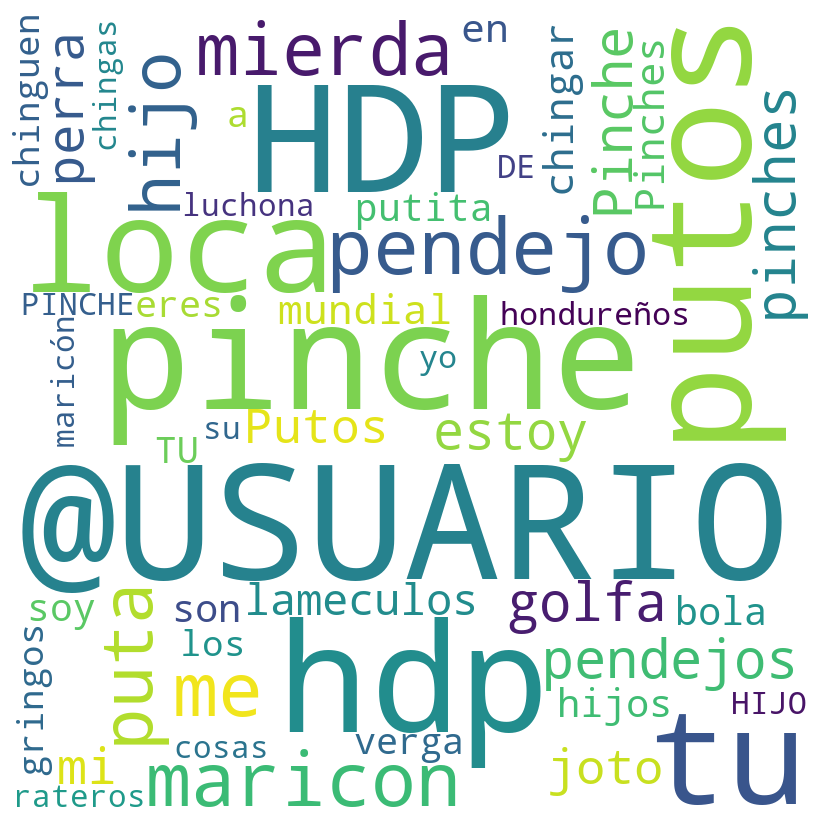

In [240]:
# Display the word cloud 
wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    max_words=50,
    min_font_size = 10)

# Generate the word cloud using the frequencies (importance scores)
wordcloud.generate_from_frequencies(target_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Para este experimento decidí implementar chi2 tal como lo sugiere Baeza-Yates, para ello primero relice el calculo de todas las variables necesarias para calcular las probabilidades correspondientes. Podemos observar que las palabras más relevantes son principalmente insultos o palabras catalogadas como negativas, esto era de esperarse ya que en experimentos previos, en general el clasificador era mejor detectando twits negativos